In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Quantum aggregator
An aggregation of quantum algorithms

1. Grover's Search
2. VQE
3. etc. etc.

Details: 
1. Ensure that the algorithm you wish to include into the quantum-aggregator is in the same folder as this notebook. 
2. Import the algorithm using the import function in Python

In [2]:
# Quantum Aggregator Wrapper

# Import algorithms 
import grovers_search as grovers
import optim_wrapper as optimization


def aggregator(algorithm, dict_details):
    if algorithm == 'grovers':
        result = grovers.grovers_search(dict_details)
    if algorithm == 'optimizer':
        result = optimization.optimize_portfolio(dict_details)
    return result


# Grover's Search function
grovers_search(expression, device, num_shots)

### Input:

expression - LogicalExpression 

device - backend, Simulator or quantum device

num_shots = number of shots, default 1024

### Output:
Result object from backend

In [3]:
# Example of using Grover's search algorithm: 
# Set the parameters: expression, backend, and shots:
expression = '((A ^ B) & (C & D) & ~(A & C))'
backend_device = Aer.get_backend('qasm_simulator')

dict_details = {
  "expression": expression,
  "quantum_instance": backend_device,
  "shots": 1024
}

In [4]:
# Call the aggregator with 'grovers' as the algorithm of choice
results = aggregator('grovers', dict_details)

2021-03-24 11:34:45,708:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.16.4
Backend: 'qasm_simulator (AerProvider)', with following setting:
{'basis_gates': ['ccx', 'cp', 'cswap', 'csx', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'kraus', 'mcp', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcy', 'mcz', 'multiplexer', 'p', 'r', 'roerror', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'snapshot', 'swap', 'sx', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z'], 'coupling_map': None}
{'initial_layout': None, 'seed_transpiler': None, 'optimization_level': None}
RunConfig(max_credits=10, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None


In [5]:
# View results: 
# Print the top measured result
print('Top result (D,C,B,A):', results['top_measurement'])

Top result (D,C,B,A): 1110


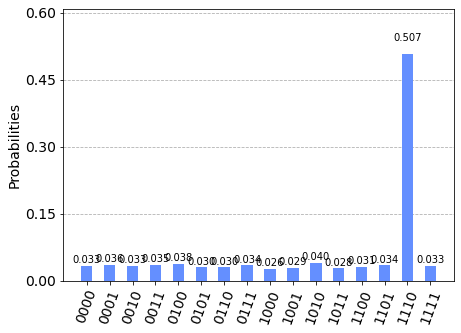

In [6]:
# Plot all measured results
plot_histogram(results['measurement'])

# Optimisation function
algorithm = 'optimizer'

### Input:

* "docplex_mod": Docplex model to be optimized

* "quantum_instance": Backend, Simulator or quantum device

* "shots": number of shots, default 1024,

* "print": boolean, whether to print the models or not

* "logfile": boolean, whether to write files with the input, logs, and results of the optimization

* "solver": method to solve the optimisation:'classical','vqe'

* "optimizer": Classical optimiser for quantum algorithms,

* "maxiter":max number of classical optimiser iterations'100',

* "depth": number of repetitions of the ansatz '1',

* "alpha": Coeficient for CVaR expectation 0.35,

* "penalty": Factor to convert restrictions to QUBO

* "initial_point": optional list of initial parameters for vqe ansatz

### Output:

* time spent in the optimisation

* Result object from backend

In [3]:
import numpy as np
from docplex.mp.model import Model

# prepare problem instance
n = 6            # number of assets
q = 0.5          # risk factor
budget = n // 2  # budget
penalty = 2*n    # scaling of penalty term
mu = np.array([0.7313, 0.9893, 0.2725, 0.8750, 0.7667, 0.3622])
sigma = np.array([
    [ 0.7312, -0.6233,  0.4689, -0.5452, -0.0082, -0.3809],
    [-0.6233,  2.4732, -0.7538,  2.4659, -0.0733,  0.8945],
    [ 0.4689, -0.7538,  1.1543, -1.4095,  0.0007, -0.4301],
    [-0.5452,  2.4659, -1.4095,  3.5067,  0.2012,  1.0922],
    [-0.0082, -0.0733,  0.0007,  0.2012,  0.6231,  0.1509],
    [-0.3809,  0.8945, -0.4301,  1.0922,  0.1509,  0.8992]
])

# create docplex model
mdl = Model('portfolio_optimization')
x = mdl.binary_var_list('x{}'.format(i) for i in range(n))
objective = mdl.sum([mu[i]*x[i] for i in range(n)])
objective -= q * mdl.sum([sigma[i,j]*x[i]*x[j] for i in range(n) for j in range(n)])
mdl.maximize(objective)
mdl.add_constraint(mdl.sum(x[i] for i in range(n)) == budget)

# import the classical optimizer
from qiskit.aqua.components.optimizers import COBYLA

optim_dict = {
  "docplex_mod": mdl,
  "quantum_instance": 'qasm_simulator',
  "shots": 1024,
  "print": True,
  "solver":'vqe',
  "optimizer":COBYLA,
  "maxiter":100,
  "depth":1,
  "alpha":0.35,
  "penalty": 2*n
}

In [4]:
# Call the aggregator with 'optimizer' as the algorithm of choice
results = aggregator('optimizer', optim_dict)

nverters.circuit_sampler:DEBUG: Parameter conversion 1.09887 (ms)
2021-03-24 11:50:10,654:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-18.82112921] - 119.88616 (ms), eval count: 28
2021-03-24 11:50:10,656:qiskit.aqua.operators.converters.circuit_sampler:DEBUG: Parameter conversion 0.97418 (ms)
2021-03-24 11:50:10,775:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-18.80819562] - 119.70711 (ms), eval count: 29
2021-03-24 11:50:10,776:qiskit.aqua.operators.converters.circuit_sampler:DEBUG: Parameter conversion 1.04189 (ms)
2021-03-24 11:50:10,878:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-18.98752734] - 102.75507 (ms), eval count: 30
2021-03-24 11:50:10,880:qiskit.aqua.operators.converters.circuit_sampler:DEBUG: Parameter conversion 1.11794 (ms)
2021-03-24 11:50:11,016:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-18.44296702] - 137.231

In [5]:
print(results)

{'quantum computational time': 13.530368028999987, 'quantum opt_result': optimal function value: 1.2783500000000068
optimal value: [1. 1. 0. 0. 1. 0.]
status: SUCCESS}


In [7]:
import qiskit.tools.jupyter
%qiskit_version_table

In [8]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}